In [ ]:
import pandas as pd

df = pd.read_csv('/content/AIR_QUALITY_ANALYSIS.csv')
df.head()


<ipython-input-1-0bd64a678e8f>:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AIR_QUALITY_ANALYSIS.csv')


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017 17:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,24-11-2017 18:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,24-11-2017 19:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,24-11-2017 20:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,24-11-2017 21:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [ ]:
print(df.columns)


Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
StationId,0
Datetime,0
PM2.5,248389
PM10,342735
NO,230649
NO2,217132
NOx,192672
NH3,466777
CO,221049
SO2,384227


In [ ]:
df = df.dropna(subset=['PM2.5', 'PM10', 'NO2'])  # Example
df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017 17:00,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.10,NaN,NaN
1,AP001,24-11-2017 18:00,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.15,NaN,NaN
2,AP001,24-11-2017 19:00,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.18,NaN,NaN
3,AP001,24-11-2017 20:00,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.10,NaN,NaN
4,AP001,24-11-2017 21:00,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048554,DL032,07-05-2018 21:00,207.00,701.00,16.07,51.99,67.77,73.69,2.54,16.18,30.55,0.65,5.58,NaN,366.0,Very Poor
1048555,DL032,07-05-2018 22:00,260.00,880.00,7.29,51.22,58.52,78.58,2.26,19.42,14.48,1.12,7.80,NaN,396.0,Very Poor
1048556,DL032,07-05-2018 23:00,233.00,696.00,12.08,50.67,62.72,80.65,1.70,14.96,8.96,2.32,8.29,NaN,415.0,Severe
1048557,DL032,08-05-2018 00:00,185.00,497.00,1.61,17.05,14.88,71.37,0.55,6.41,46.89,1.95,5.50,NaN,424.0,Severe


In [ ]:
df = df.fillna(method='ffill')  # Forward fill


<ipython-input-5-8bf43c5d07bc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')
df

<ipython-input-7-b878593fc579>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
285144,DL007,2015-01-01 01:00:00,598.51,935.18,69.03,35.69,104.72,19.95,0.58,13.55,108.02,12.89,19.85,13.80,340.0,Very Poor
285148,DL007,2015-01-01 05:00:00,625.27,976.99,70.91,35.82,106.74,19.95,0.58,13.55,108.02,13.34,20.55,14.29,340.0,Very Poor
285149,DL007,2015-01-01 06:00:00,551.83,862.23,60.75,35.80,96.55,19.95,0.61,13.55,108.02,11.59,17.85,12.42,340.0,Very Poor
285150,DL007,2015-01-01 07:00:00,468.37,731.83,49.83,35.85,85.68,19.95,0.67,13.55,197.69,9.67,14.89,10.35,340.0,Very Poor
285151,DL007,2015-01-01 08:00:00,464.47,725.74,49.19,36.17,85.36,19.95,0.67,13.55,197.69,9.56,14.73,10.24,340.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802904,DL022,2020-07-01 00:00:00,46.00,123.00,0.32,8.85,4.92,21.12,3.55,7.72,30.38,1.75,6.85,2.60,120.0,Moderate
264671,DL005,2020-07-01 00:00:00,77.00,206.00,1.07,24.45,13.93,19.95,0.62,13.55,12.93,0.15,159.85,0.00,129.0,Moderate
824038,DL023,2020-07-01 00:00:00,72.50,189.50,3.42,35.77,21.85,24.42,0.38,3.67,14.57,2.42,81.18,2.60,115.0,Moderate
402663,DL009,2020-07-01 00:00:00,51.50,134.25,1.95,27.15,16.02,16.68,0.90,5.30,50.10,1.62,13.00,0.00,111.0,Moderate


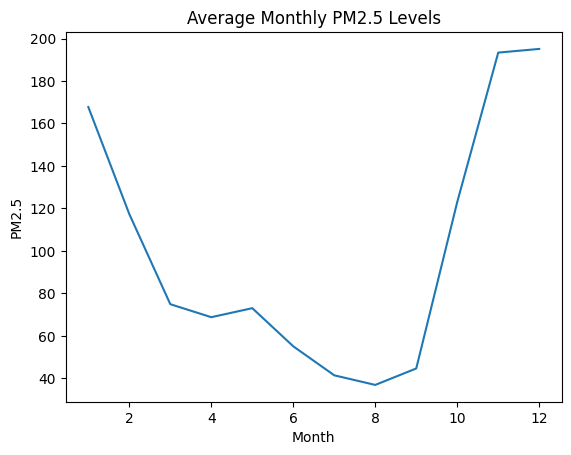

In [ ]:
import matplotlib.pyplot as plt

df.groupby(df['Datetime'].dt.month)['PM2.5'].mean().plot(kind='line')
plt.title('Average Monthly PM2.5 Levels')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.show()


In [ ]:
!pip install prophet


<ipython-input-10-1cd836323657>:10: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AIR_QUALITY_ANALYSIS.csv')  # replace with your actual file path
<ipython-input-10-1cd836323657>:15: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbn1u_qyv/zl68nwqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbn1u_qyv/2ctmqx3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52821', 'data', 'file=/tmp/tmpbn1u_qyv/zl68nwqx.json', 'init=/tmp/tmpbn1u_qyv/2ctmqx3b.json', 'outpu

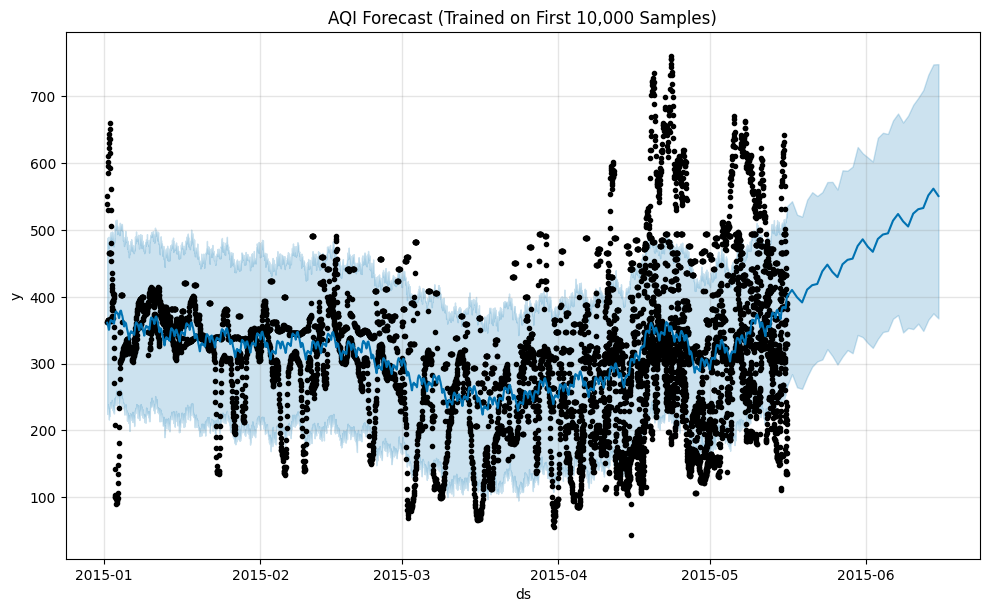

In [ ]:
# Step 1: Install Prophet if not already
# !pip install prophet

# Step 2: Import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 3: Load the dataset
df = pd.read_csv('/content/AIR_QUALITY_ANALYSIS.csv')  # replace with your actual file path

# Step 4: Select only Datetime and AQI columns
df = df[['Datetime', 'AQI']].copy()
df.rename(columns={'Datetime': 'ds', 'AQI': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

df = df.dropna(subset=['y']).sort_values('ds')

df_10k = df.iloc[:10000]

model = Prophet()
model.fit(df_10k)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)
plt.title("AQI Forecast (Trained on First 10,000 Samples)")
plt.show()




In [ ]:
!pip install -U scikit-learn


In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
from prophet import Prophet

# Initialize the Prophet model with tuning
model = Prophet(
    # Add custom seasonalities (weekly, yearly)
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=True,  # Enable weekly seasonality
    daily_seasonality=False,  # Disabling daily seasonality as it's irrelevant for AQI

    # More flexibility for detecting changepoints in trend
    changepoint_prior_scale=0.1,  # Increase sensitivity to trend changes (0.1 is more flexible)
    seasonality_prior_scale=10,   # Make seasonality more flexible
    holidays_prior_scale=10,      # Allow holidays to have more influence on predictions
    mcmc_samples=500,             # Increase samples for more accurate forecasting
    interval_width=0.95           # Set confidence intervals to 95%
)

# Train the model
model.fit(df_10k)


DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbn1u_qyv/2l9jpajs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbn1u_qyv/i8hwfl9j.json
03:54:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=3797', 'data', 'file=/tmp/tmpbn1u_qyv/2l9jpajs.json', 'init=/tmp/tmpbn1u_qyv/i8hwfl9j.json', 'output', 'file=/tmp/tmpbn1u_qyv/prophet_modeldpqctfq_/prophet_model-20250517035402_2.csv', 'method=sample', 'num_samples=250', 'num_warmup=250', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=3797', 'data', 'file=/tmp/tmpbn1u_qyv/2l9jpajs.json', 'init=/tmp/tmpbn1u_qyv/i8hwfl9j.json', 'output', 'file=/tmp/tmpbn1u_qyv/prophet_modeldpqctfq_/prophet_model-20250517035402_1.csv', 'method=sample', 'num_samples=250', 'num_warmup=250', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

04:45:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=3797', 'data', 'file=/tmp/tmpbn1u_qyv/2l9jpajs.json', 'init=/tmp/tmpbn1u_qyv/i8hwfl9j.json', 'output', 'file=/tmp/tmpbn1u_qyv/prophet_modeldpqctfq_/prophet_model-20250517035402_1.csv', 'method=sample', 'num_samples=250', 'num_warmup=250', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbn1u_qyv/prophet_modeldpqctfq_/prophet_model-20250517035402_1.csv
 console_msgs (if any):
	/tmp/tmpbn1u_qyv/prophet_modeldpqctfq_/prophet_model-20250517035402_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 250
    num_warmup = 250
    save_warmup = 0 (Default)
    thin = 1 (Defaul

04:45:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 250 iterations at max treedepth (100.0%)
	Chain 2 had 250 iterations at max treedepth (100.0%)
	Chain 3 had 250 iterations at max treedepth (100.0%)
	Chain 4 had 250 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 250 iterations at max treedepth (100.0%)
	Chain 2 had 250 iterations at max treedepth (100.0%)
	Chain 3 had 250 iterations at max treedepth (100.0%)
	Chain 4 had 250 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


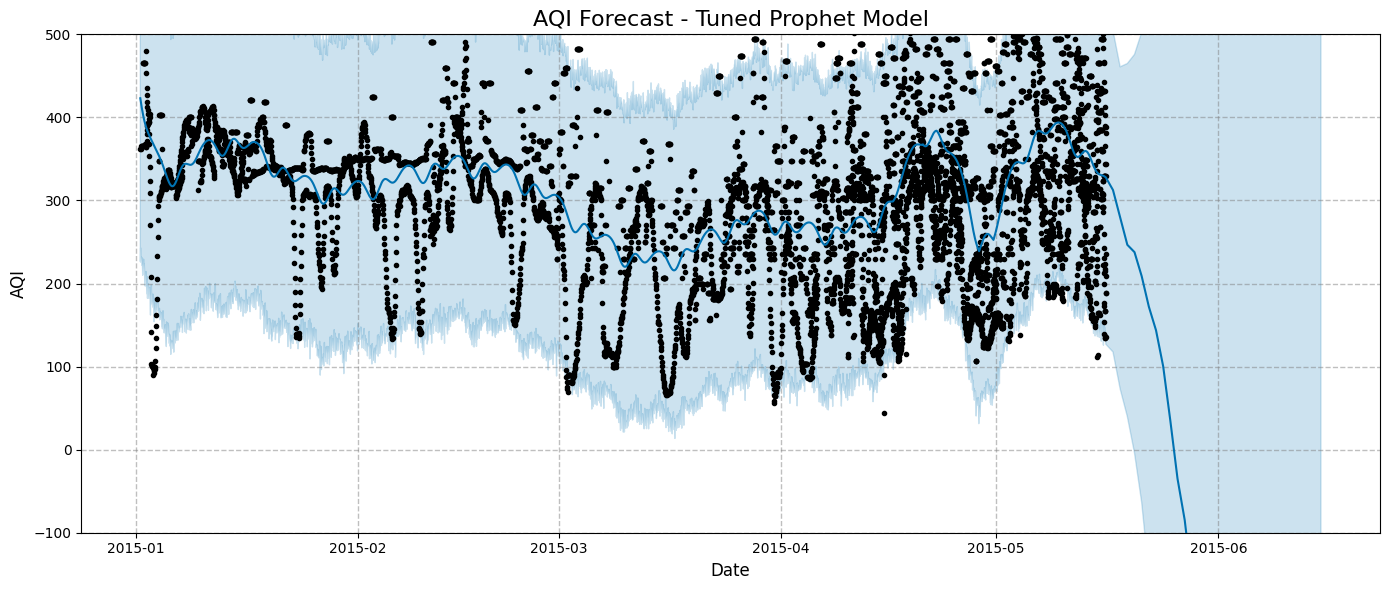

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Predict future
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Clean and professional plot
fig, ax = plt.subplots(figsize=(14, 6))  # Wider plot
model.plot(forecast, ax=ax)

# Limit y-axis range to focus on data
ax.set_ylim(-100, 500)  # Adjust based on your actual AQI values

# Optional: limit the x-axis to recent data
# ax.set_xlim(forecast['ds'].iloc[-120], forecast['ds'].iloc[-1])  # last 120 days

# Tweak labels and title
ax.set_title("AQI Forecast - Tuned Prophet Model", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("AQI", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

plt.show()



In [ ]:
import pickle

# Save the model to a file
with open('model_AQ.pt', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Load the model from the file
with open('model_AQ.pt', 'rb') as f:
    model = pickle.load(f)


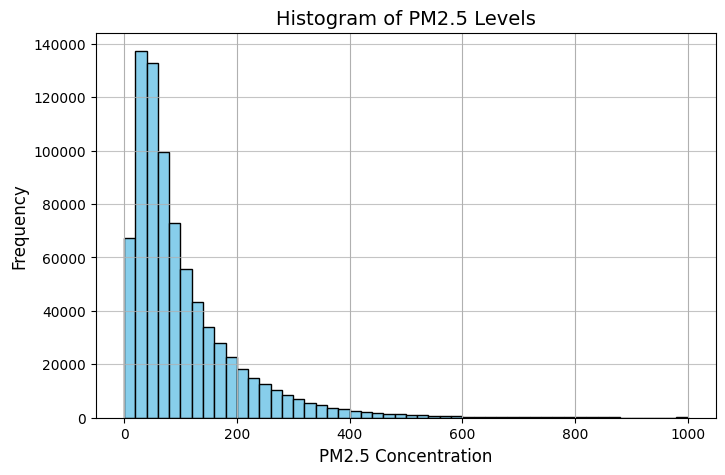

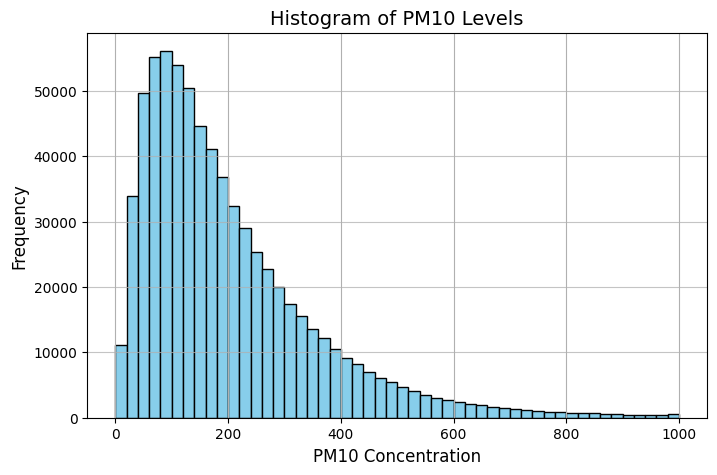

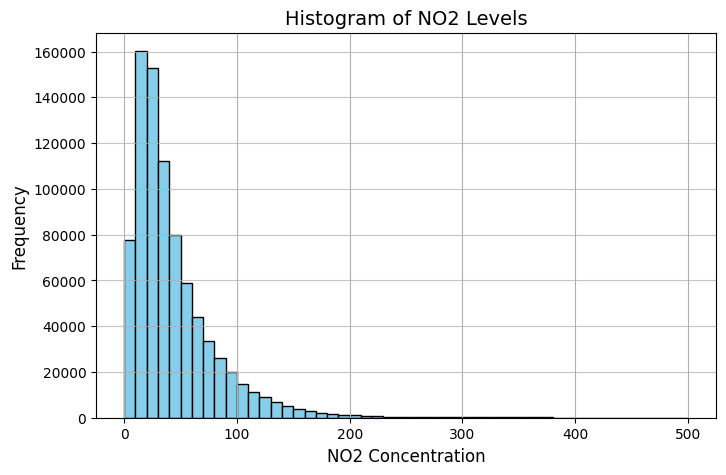

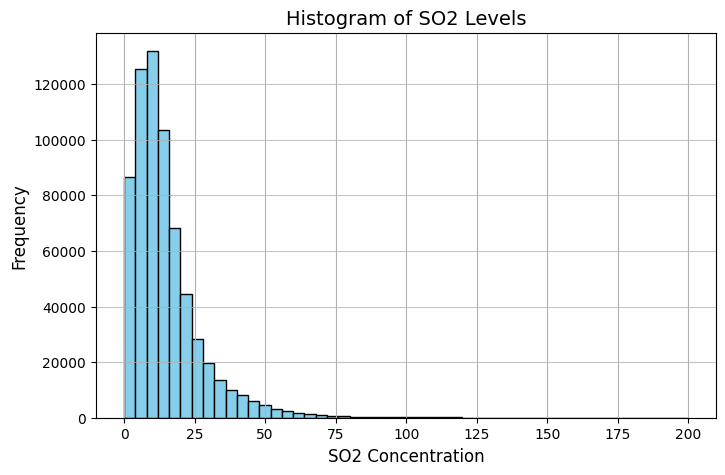

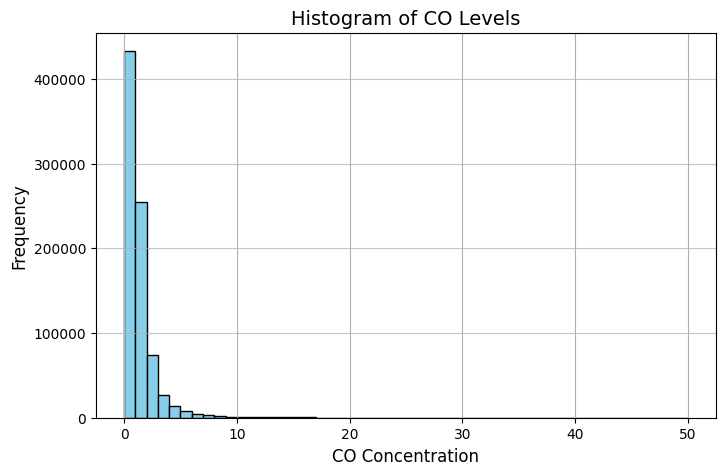

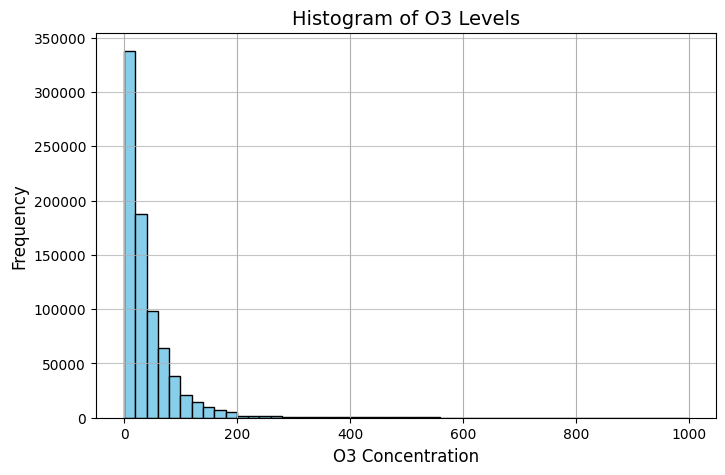

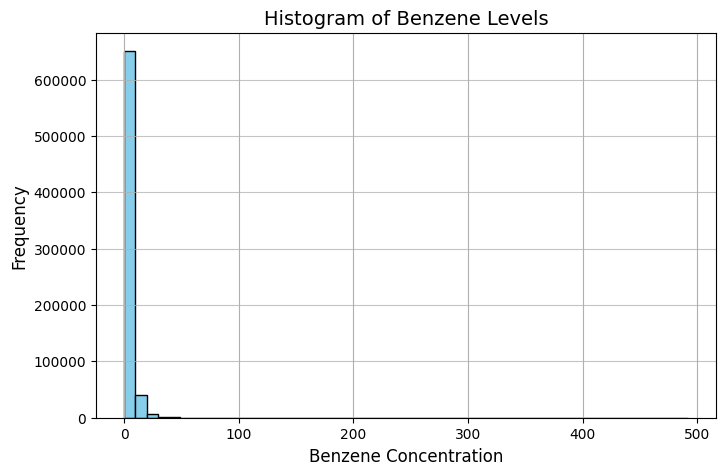

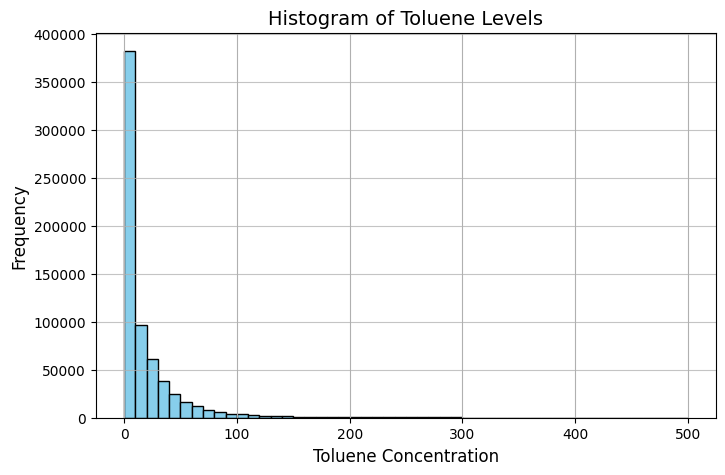

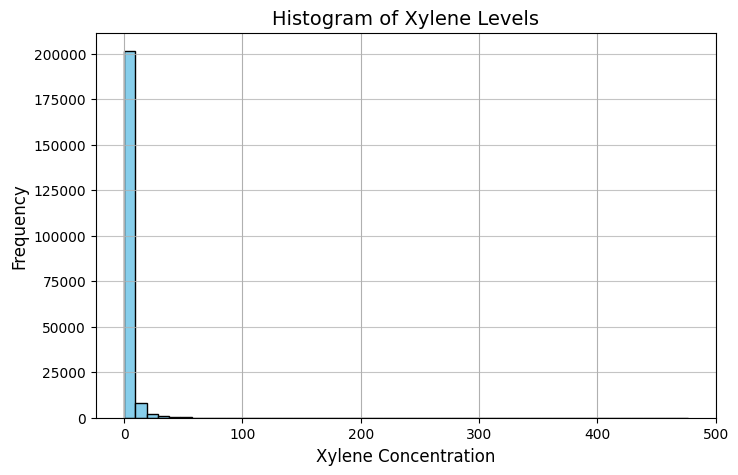

In [ ]:
# prompt: plot histogram plot for all pollutants in dataset
import matplotlib.pyplot as plt

# Identify pollutant columns
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Plot histograms for each pollutant
for col in pollutant_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        df[col].hist(bins=50, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col} Levels', fontsize=14)
        plt.xlabel(f'{col} Concentration', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', alpha=0.75)
        plt.show()

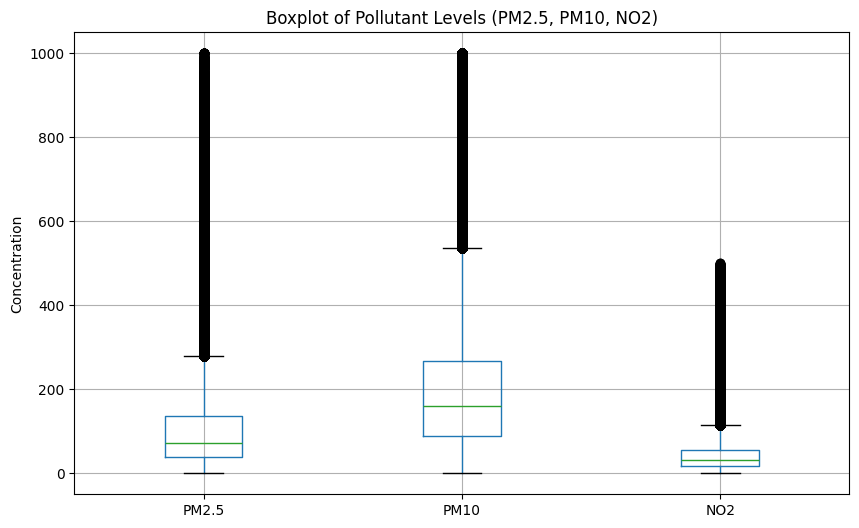

In [ ]:
# prompt: perform boxplot for in PM2.5, PM10, and NOx levels

plt.figure(figsize=(10, 6))
df[['PM2.5', 'PM10', 'NO2']].boxplot()
plt.title('Boxplot of Pollutant Levels (PM2.5, PM10, NO2)')
plt.ylabel('Concentration')
plt.show()